# Import

In [1]:
import csv 
import tensorflow as tf
from numpy import loadtxt
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
import statistics
import copy

# Setting the main model


In [2]:
# Reading the data from csv file
# Columns: Rfloor / Rwalls / Rroof / Rotation / WWR / EUI
dataset=loadtxt('data.csv',delimiter=',')
np.random.shuffle(dataset) 
props=dataset[:,:5]
eui=dataset[:,5:]
props=np.array(props)
eui=np.array(eui)

In [3]:
# Custom metrics
def root_mean_squared_error(y_true, y_pred):
        return tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(y_pred - y_true)))

def abs_max_err(y_true, y_pred):
        return tf.keras.backend.max((tf.keras.backend.abs(y_pred - y_true)))
   

In [5]:
tf.keras.backend.clear_session()    

bias_init= tf.keras.initializers.Constant(np.mean(eui))

initializer = tf.keras.initializers.GlorotNormal()
    
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
    
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 3e-5*(2500-epoch)/2500) 


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(900,kernel_initializer=initializer,input_dim=5
                                ,activity_regularizer=regularizers.l2(2e-5)
                               ))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.Dense(550,kernel_initializer=initializer))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.Dense(300,kernel_initializer=initializer,
                                activity_regularizer=regularizers.l2(1e-6)))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.Dense(128,kernel_initializer=initializer,activation=tf.keras.activations.selu))
model.add(tf.keras.layers.Dense(32,kernel_initializer=initializer,activation=tf.keras.activations.selu))
model.add(tf.keras.layers.Dense(1,use_bias=True, bias_initializer=bias_init))

model.compile(loss = root_mean_squared_error,
              optimizer = optimizer,
             metrics=['mae',abs_max_err,'mse'])

history = model.fit(props,eui, epochs=2250, batch_size=40, 
                    callbacks=[lr_schedule],
                    validation_split=0.0625)

Epoch 1/2250
243/243 [==============================] - 3s 12ms/step - loss: 326.0810 - mae: 264.5603 - abs_max_err: 688.5391 - mse: 110149.3828 - val_loss: 234.9124 - val_mae: 174.5441 - val_abs_max_err: 550.8158 - val_mse: 55374.8281 - lr: 3.0000e-05
Epoch 2/2250
243/243 [==============================] - 2s 10ms/step - loss: 170.0043 - mae: 126.7707 - abs_max_err: 494.8417 - mse: 30030.3457 - val_loss: 147.6834 - val_mae: 111.3751 - val_abs_max_err: 449.1663 - val_mse: 22280.8164 - lr: 2.9988e-05
Epoch 3/2250
243/243 [==============================] - 2s 10ms/step - loss: 141.0350 - mae: 104.5810 - abs_max_err: 453.5231 - mse: 20401.7305 - val_loss: 143.4091 - val_mae: 110.7075 - val_abs_max_err: 419.0818 - val_mse: 20894.8828 - lr: 2.9976e-05
Epoch 4/2250
243/243 [==============================] - 2s 10ms/step - loss: 137.0065 - mae: 101.4788 - abs_max_err: 427.3859 - mse: 19233.4531 - val_loss: 140.2497 - val_mae: 105.8557 - val_abs_max_err: 410.7179 - val_mse: 19982.4922 - lr: 2.

Epoch 34/2250
243/243 [==============================] - 2s 10ms/step - loss: 37.3688 - mae: 23.8434 - abs_max_err: 136.3043 - mse: 1544.8799 - val_loss: 41.0290 - val_mae: 25.2141 - val_abs_max_err: 152.3366 - val_mse: 1822.3075 - lr: 2.9604e-05
Epoch 35/2250
243/243 [==============================] - 2s 10ms/step - loss: 35.0761 - mae: 22.2325 - abs_max_err: 129.3626 - mse: 1377.5533 - val_loss: 36.5693 - val_mae: 21.7075 - val_abs_max_err: 136.3988 - val_mse: 1498.5320 - lr: 2.9592e-05
Epoch 36/2250
243/243 [==============================] - 2s 10ms/step - loss: 33.1610 - mae: 20.7494 - abs_max_err: 122.0511 - mse: 1234.7053 - val_loss: 34.2259 - val_mae: 21.2318 - val_abs_max_err: 125.1242 - val_mse: 1332.0677 - lr: 2.9580e-05
Epoch 37/2250
243/243 [==============================] - 3s 11ms/step - loss: 31.7175 - mae: 20.0942 - abs_max_err: 116.5870 - mse: 1133.4364 - val_loss: 33.6914 - val_mae: 19.8474 - val_abs_max_err: 126.4092 - val_mse: 1282.7998 - lr: 2.9568e-05
Epoch 38/225

Epoch 68/2250
243/243 [==============================] - 2s 10ms/step - loss: 7.1227 - mae: 4.3836 - abs_max_err: 25.3147 - mse: 105.9571 - val_loss: 9.4805 - val_mae: 4.7790 - val_abs_max_err: 38.8943 - val_mse: 133.0288 - lr: 2.9196e-05
Epoch 69/2250
243/243 [==============================] - 2s 10ms/step - loss: 7.1145 - mae: 4.3216 - abs_max_err: 25.4391 - mse: 103.7824 - val_loss: 7.5186 - val_mae: 3.6816 - val_abs_max_err: 32.8710 - val_mse: 111.2350 - lr: 2.9184e-05
Epoch 70/2250
243/243 [==============================] - 2s 10ms/step - loss: 7.1063 - mae: 4.2596 - abs_max_err: 25.9838 - mse: 101.6695 - val_loss: 7.6637 - val_mae: 3.9857 - val_abs_max_err: 32.5101 - val_mse: 108.3448 - lr: 2.9172e-05
Epoch 71/2250
243/243 [==============================] - 2s 10ms/step - loss: 6.6285 - mae: 3.9197 - abs_max_err: 23.9613 - mse: 94.9458 - val_loss: 8.7222 - val_mae: 4.9881 - val_abs_max_err: 35.7945 - val_mse: 119.5372 - lr: 2.9160e-05
Epoch 72/2250
243/243 [======================

243/243 [==============================] - 2s 10ms/step - loss: 4.9216 - mae: 3.2054 - abs_max_err: 15.0951 - mse: 37.1021 - val_loss: 5.7953 - val_mae: 4.6995 - val_abs_max_err: 13.1306 - val_mse: 30.6483 - lr: 2.8380e-05
Epoch 137/2250
243/243 [==============================] - 2s 10ms/step - loss: 4.4317 - mae: 2.8315 - abs_max_err: 13.6533 - mse: 32.4408 - val_loss: 3.4905 - val_mae: 2.0849 - val_abs_max_err: 11.6013 - val_mse: 11.3750 - lr: 2.8368e-05
Epoch 138/2250
243/243 [==============================] - 2s 10ms/step - loss: 4.2984 - mae: 2.7793 - abs_max_err: 13.0284 - mse: 31.4572 - val_loss: 4.6530 - val_mae: 3.4929 - val_abs_max_err: 12.1032 - val_mse: 19.4710 - lr: 2.8356e-05
Epoch 139/2250
243/243 [==============================] - 2s 9ms/step - loss: 4.3144 - mae: 2.7650 - abs_max_err: 13.2642 - mse: 30.6461 - val_loss: 3.5182 - val_mae: 2.2965 - val_abs_max_err: 10.6990 - val_mse: 11.4411 - lr: 2.8344e-05
Epoch 140/2250
243/243 [==============================] - 2s 10m

243/243 [==============================] - 3s 10ms/step - loss: 3.6180 - mae: 2.4354 - abs_max_err: 9.8783 - mse: 16.4434 - val_loss: 3.5695 - val_mae: 2.3502 - val_abs_max_err: 9.5247 - val_mse: 10.8473 - lr: 2.7564e-05
Epoch 205/2250
243/243 [==============================] - 3s 12ms/step - loss: 4.1257 - mae: 2.8615 - abs_max_err: 11.1334 - mse: 20.3728 - val_loss: 3.7745 - val_mae: 2.6102 - val_abs_max_err: 10.0161 - val_mse: 11.9966 - lr: 2.7552e-05
Epoch 206/2250
243/243 [==============================] - 3s 13ms/step - loss: 3.6114 - mae: 2.3762 - abs_max_err: 10.3314 - mse: 15.8305 - val_loss: 2.8563 - val_mae: 1.8952 - val_abs_max_err: 7.2846 - val_mse: 6.3770 - lr: 2.7540e-05
Epoch 207/2250
243/243 [==============================] - 3s 13ms/step - loss: 3.3839 - mae: 2.1961 - abs_max_err: 9.5184 - mse: 14.3939 - val_loss: 3.1884 - val_mae: 2.4279 - val_abs_max_err: 6.3031 - val_mse: 8.1679 - lr: 2.7528e-05
Epoch 208/2250
243/243 [==============================] - 3s 13ms/step

Epoch 239/2250
243/243 [==============================] - 3s 13ms/step - loss: 3.3909 - mae: 2.2831 - abs_max_err: 9.2523 - mse: 12.7399 - val_loss: 2.6076 - val_mae: 1.7772 - val_abs_max_err: 6.5251 - val_mse: 5.5251 - lr: 2.7144e-05
Epoch 240/2250
243/243 [==============================] - 3s 14ms/step - loss: 3.7694 - mae: 2.5949 - abs_max_err: 10.1135 - mse: 15.1107 - val_loss: 3.9428 - val_mae: 3.0322 - val_abs_max_err: 9.3258 - val_mse: 13.3257 - lr: 2.7132e-05
Epoch 241/2250
243/243 [==============================] - 3s 10ms/step - loss: 3.1965 - mae: 2.1222 - abs_max_err: 8.8359 - mse: 10.9997 - val_loss: 2.8286 - val_mae: 1.8228 - val_abs_max_err: 8.3904 - val_mse: 6.6547 - lr: 2.7120e-05
Epoch 242/2250
243/243 [==============================] - 3s 11ms/step - loss: 3.9529 - mae: 2.7102 - abs_max_err: 10.8413 - mse: 16.4519 - val_loss: 4.6150 - val_mae: 3.5110 - val_abs_max_err: 12.2280 - val_mse: 18.8949 - lr: 2.7108e-05
Epoch 243/2250
243/243 [==============================]

Epoch 274/2250
243/243 [==============================] - 3s 10ms/step - loss: 3.4304 - mae: 2.3875 - abs_max_err: 8.8050 - mse: 12.0511 - val_loss: 2.5785 - val_mae: 1.7673 - val_abs_max_err: 6.6034 - val_mse: 5.5544 - lr: 2.6724e-05
Epoch 275/2250
243/243 [==============================] - 2s 10ms/step - loss: 3.1553 - mae: 2.1414 - abs_max_err: 8.2484 - mse: 10.1426 - val_loss: 4.5549 - val_mae: 3.3441 - val_abs_max_err: 10.0961 - val_mse: 18.1625 - lr: 2.6712e-05
Epoch 276/2250
243/243 [==============================] - 2s 10ms/step - loss: 3.5944 - mae: 2.5439 - abs_max_err: 9.1659 - mse: 13.3671 - val_loss: 3.0964 - val_mae: 1.8213 - val_abs_max_err: 9.6766 - val_mse: 8.5292 - lr: 2.6700e-05
Epoch 277/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.8730 - mae: 1.8825 - abs_max_err: 7.7088 - mse: 8.5320 - val_loss: 3.7522 - val_mae: 2.2890 - val_abs_max_err: 12.2034 - val_mse: 12.8954 - lr: 2.6688e-05
Epoch 278/2250
243/243 [==============================] -

Epoch 309/2250
243/243 [==============================] - 4s 16ms/step - loss: 2.8694 - mae: 1.9262 - abs_max_err: 7.5487 - mse: 8.0988 - val_loss: 2.3713 - val_mae: 1.5029 - val_abs_max_err: 6.5470 - val_mse: 4.8059 - lr: 2.6304e-05
Epoch 310/2250
243/243 [==============================] - 3s 14ms/step - loss: 3.0358 - mae: 2.0363 - abs_max_err: 8.1549 - mse: 9.1781 - val_loss: 2.3318 - val_mae: 1.4540 - val_abs_max_err: 6.3252 - val_mse: 4.5385 - lr: 2.6292e-05
Epoch 311/2250
243/243 [==============================] - 3s 12ms/step - loss: 3.0123 - mae: 2.0174 - abs_max_err: 8.0237 - mse: 8.7350 - val_loss: 2.1441 - val_mae: 1.2301 - val_abs_max_err: 6.3041 - val_mse: 3.9395 - lr: 2.6280e-05
Epoch 312/2250
243/243 [==============================] - 3s 12ms/step - loss: 3.2496 - mae: 2.2363 - abs_max_err: 8.6649 - mse: 10.2589 - val_loss: 3.5619 - val_mae: 2.4753 - val_abs_max_err: 9.2271 - val_mse: 11.1574 - lr: 2.6268e-05
Epoch 313/2250
243/243 [==============================] - 3s 1

Epoch 344/2250
243/243 [==============================] - 3s 13ms/step - loss: 3.1032 - mae: 2.1490 - abs_max_err: 7.9636 - mse: 9.5038 - val_loss: 2.6093 - val_mae: 1.9145 - val_abs_max_err: 6.0259 - val_mse: 5.6401 - lr: 2.5884e-05
Epoch 345/2250
243/243 [==============================] - 3s 12ms/step - loss: 2.7920 - mae: 1.8675 - abs_max_err: 7.2303 - mse: 7.3061 - val_loss: 3.2448 - val_mae: 2.1508 - val_abs_max_err: 9.5762 - val_mse: 8.9967 - lr: 2.5872e-05
Epoch 346/2250
243/243 [==============================] - 3s 11ms/step - loss: 2.9945 - mae: 2.0537 - abs_max_err: 7.7305 - mse: 8.4699 - val_loss: 2.5888 - val_mae: 1.6573 - val_abs_max_err: 7.3363 - val_mse: 5.6414 - lr: 2.5860e-05
Epoch 347/2250
243/243 [==============================] - 3s 11ms/step - loss: 2.9416 - mae: 1.9876 - abs_max_err: 7.8208 - mse: 8.0615 - val_loss: 2.6171 - val_mae: 1.5116 - val_abs_max_err: 7.9398 - val_mse: 5.7083 - lr: 2.5848e-05
Epoch 348/2250
243/243 [==============================] - 3s 12m

Epoch 379/2250
243/243 [==============================] - 3s 13ms/step - loss: 2.9167 - mae: 2.0075 - abs_max_err: 7.4772 - mse: 7.8826 - val_loss: 4.7724 - val_mae: 3.4979 - val_abs_max_err: 12.0613 - val_mse: 20.3529 - lr: 2.5464e-05
Epoch 380/2250
243/243 [==============================] - 3s 11ms/step - loss: 2.6884 - mae: 1.8036 - abs_max_err: 7.0685 - mse: 6.6073 - val_loss: 2.4209 - val_mae: 1.5676 - val_abs_max_err: 6.8701 - val_mse: 4.7448 - lr: 2.5452e-05
Epoch 381/2250
243/243 [==============================] - 3s 12ms/step - loss: 2.7303 - mae: 1.8460 - abs_max_err: 6.9590 - mse: 6.6869 - val_loss: 2.5444 - val_mae: 1.7571 - val_abs_max_err: 6.4029 - val_mse: 5.1881 - lr: 2.5440e-05
Epoch 382/2250
243/243 [==============================] - 3s 10ms/step - loss: 2.4699 - mae: 1.6558 - abs_max_err: 6.2258 - mse: 5.5106 - val_loss: 2.8689 - val_mae: 2.0377 - val_abs_max_err: 7.1105 - val_mse: 6.8191 - lr: 2.5428e-05
Epoch 383/2250
243/243 [==============================] - 3s 1

Epoch 414/2250
243/243 [==============================] - 3s 11ms/step - loss: 2.7093 - mae: 1.8831 - abs_max_err: 6.7702 - mse: 6.5575 - val_loss: 2.2397 - val_mae: 1.2925 - val_abs_max_err: 6.3375 - val_mse: 3.8902 - lr: 2.5044e-05
Epoch 415/2250
243/243 [==============================] - 3s 10ms/step - loss: 2.6433 - mae: 1.7765 - abs_max_err: 6.9606 - mse: 6.2564 - val_loss: 2.6591 - val_mae: 1.6361 - val_abs_max_err: 8.0745 - val_mse: 6.0781 - lr: 2.5032e-05
Epoch 416/2250
243/243 [==============================] - 3s 11ms/step - loss: 2.7891 - mae: 1.9328 - abs_max_err: 6.9886 - mse: 7.0972 - val_loss: 2.2434 - val_mae: 1.3092 - val_abs_max_err: 7.0173 - val_mse: 4.1909 - lr: 2.5020e-05
Epoch 417/2250
243/243 [==============================] - 3s 11ms/step - loss: 2.4410 - mae: 1.6525 - abs_max_err: 6.1493 - mse: 5.2121 - val_loss: 2.3235 - val_mae: 1.4316 - val_abs_max_err: 6.3035 - val_mse: 4.3044 - lr: 2.5008e-05
Epoch 418/2250
243/243 [==============================] - 3s 11m

Epoch 449/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.4223 - mae: 1.6170 - abs_max_err: 6.2127 - mse: 5.1846 - val_loss: 2.1941 - val_mae: 1.3317 - val_abs_max_err: 6.4137 - val_mse: 3.7877 - lr: 2.4624e-05
Epoch 450/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.9384 - mae: 2.1068 - abs_max_err: 7.0621 - mse: 7.8816 - val_loss: 2.7830 - val_mae: 1.8802 - val_abs_max_err: 7.4144 - val_mse: 6.3900 - lr: 2.4612e-05
Epoch 451/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.2764 - mae: 1.4880 - abs_max_err: 5.9606 - mse: 4.5456 - val_loss: 2.3987 - val_mae: 1.4655 - val_abs_max_err: 7.2156 - val_mse: 4.6805 - lr: 2.4600e-05
Epoch 452/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.6920 - mae: 1.8563 - abs_max_err: 6.8699 - mse: 6.4892 - val_loss: 3.3369 - val_mae: 2.1338 - val_abs_max_err: 10.2537 - val_mse: 9.7060 - lr: 2.4588e-05
Epoch 453/2250
243/243 [==============================] - 2s 10

Epoch 484/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.6424 - mae: 1.8370 - abs_max_err: 6.6941 - mse: 6.3904 - val_loss: 2.3608 - val_mae: 1.6968 - val_abs_max_err: 5.7834 - val_mse: 4.4381 - lr: 2.4204e-05
Epoch 485/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.6651 - mae: 1.8118 - abs_max_err: 6.9764 - mse: 6.5069 - val_loss: 3.4579 - val_mae: 2.6808 - val_abs_max_err: 7.9298 - val_mse: 10.2309 - lr: 2.4192e-05
Epoch 486/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.3199 - mae: 1.5839 - abs_max_err: 5.6928 - mse: 4.5317 - val_loss: 2.5734 - val_mae: 1.6119 - val_abs_max_err: 7.0509 - val_mse: 5.3910 - lr: 2.4180e-05
Epoch 487/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.6106 - mae: 1.7664 - abs_max_err: 6.8848 - mse: 5.9579 - val_loss: 3.0071 - val_mae: 2.2380 - val_abs_max_err: 6.3376 - val_mse: 7.6465 - lr: 2.4168e-05
Epoch 488/2250
243/243 [==============================] - 2s 10

243/243 [==============================] - 3s 11ms/step - loss: 2.5466 - mae: 1.7336 - abs_max_err: 6.5915 - mse: 5.6456 - val_loss: 2.2555 - val_mae: 1.3596 - val_abs_max_err: 6.2688 - val_mse: 4.0284 - lr: 2.3784e-05
Epoch 520/2250
243/243 [==============================] - 3s 12ms/step - loss: 2.5297 - mae: 1.7829 - abs_max_err: 6.0939 - mse: 5.5935 - val_loss: 1.9393 - val_mae: 1.1851 - val_abs_max_err: 5.3006 - val_mse: 2.8648 - lr: 2.3772e-05
Epoch 521/2250
243/243 [==============================] - 3s 14ms/step - loss: 2.1650 - mae: 1.4335 - abs_max_err: 5.6092 - mse: 3.8783 - val_loss: 1.7595 - val_mae: 1.0535 - val_abs_max_err: 4.7496 - val_mse: 2.2613 - lr: 2.3760e-05
Epoch 522/2250
243/243 [==============================] - 3s 13ms/step - loss: 2.3511 - mae: 1.5666 - abs_max_err: 6.1095 - mse: 4.6300 - val_loss: 3.8397 - val_mae: 3.1026 - val_abs_max_err: 8.4891 - val_mse: 12.9035 - lr: 2.3748e-05
Epoch 523/2250
243/243 [==============================] - 3s 13ms/step - loss:

243/243 [==============================] - 3s 12ms/step - loss: 2.3259 - mae: 1.5858 - abs_max_err: 5.7281 - mse: 4.6900 - val_loss: 1.5252 - val_mae: 0.9861 - val_abs_max_err: 3.5816 - val_mse: 1.6250 - lr: 2.3364e-05
Epoch 555/2250
243/243 [==============================] - 3s 12ms/step - loss: 2.4684 - mae: 1.6799 - abs_max_err: 6.3135 - mse: 5.3763 - val_loss: 1.9697 - val_mae: 1.2193 - val_abs_max_err: 5.2689 - val_mse: 3.0182 - lr: 2.3352e-05
Epoch 556/2250
243/243 [==============================] - 3s 12ms/step - loss: 2.3833 - mae: 1.6260 - abs_max_err: 5.9873 - mse: 4.9053 - val_loss: 3.7253 - val_mae: 3.0616 - val_abs_max_err: 7.4543 - val_mse: 12.0748 - lr: 2.3340e-05
Epoch 557/2250
243/243 [==============================] - 3s 12ms/step - loss: 2.3986 - mae: 1.6366 - abs_max_err: 6.1031 - mse: 4.8906 - val_loss: 1.7684 - val_mae: 1.2653 - val_abs_max_err: 3.4940 - val_mse: 2.2945 - lr: 2.3328e-05
Epoch 558/2250
243/243 [==============================] - 3s 12ms/step - loss:

Epoch 589/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.2125 - mae: 1.4421 - abs_max_err: 5.8783 - mse: 4.1662 - val_loss: 1.9316 - val_mae: 1.3100 - val_abs_max_err: 4.5699 - val_mse: 2.8281 - lr: 2.2944e-05
Epoch 590/2250
243/243 [==============================] - 3s 11ms/step - loss: 2.0658 - mae: 1.3910 - abs_max_err: 5.0513 - mse: 3.4949 - val_loss: 1.6743 - val_mae: 1.0723 - val_abs_max_err: 4.3153 - val_mse: 2.0992 - lr: 2.2932e-05
Epoch 591/2250
243/243 [==============================] - 3s 11ms/step - loss: 2.1900 - mae: 1.4849 - abs_max_err: 5.4352 - mse: 4.0704 - val_loss: 1.3854 - val_mae: 0.8153 - val_abs_max_err: 3.5463 - val_mse: 1.3196 - lr: 2.2920e-05
Epoch 592/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.2246 - mae: 1.4806 - abs_max_err: 5.8441 - mse: 4.2250 - val_loss: 2.4571 - val_mae: 1.6104 - val_abs_max_err: 6.1766 - val_mse: 4.9393 - lr: 2.2908e-05
Epoch 593/2250
243/243 [==============================] - 2s 10m

243/243 [==============================] - 3s 12ms/step - loss: 2.1475 - mae: 1.4303 - abs_max_err: 5.5033 - mse: 3.9141 - val_loss: 1.9311 - val_mae: 1.1986 - val_abs_max_err: 5.1881 - val_mse: 2.8885 - lr: 2.2524e-05
Epoch 625/2250
243/243 [==============================] - 3s 12ms/step - loss: 2.1826 - mae: 1.4414 - abs_max_err: 5.7053 - mse: 4.0592 - val_loss: 2.5037 - val_mae: 1.7022 - val_abs_max_err: 7.2967 - val_mse: 5.1395 - lr: 2.2512e-05
Epoch 626/2250
243/243 [==============================] - 3s 11ms/step - loss: 2.4077 - mae: 1.6747 - abs_max_err: 5.9268 - mse: 5.0670 - val_loss: 1.9135 - val_mae: 1.1131 - val_abs_max_err: 5.7241 - val_mse: 2.9058 - lr: 2.2500e-05
Epoch 627/2250
243/243 [==============================] - 3s 13ms/step - loss: 2.3340 - mae: 1.6224 - abs_max_err: 5.6735 - mse: 4.9579 - val_loss: 3.5968 - val_mae: 2.7629 - val_abs_max_err: 9.1107 - val_mse: 11.3420 - lr: 2.2488e-05
Epoch 628/2250
243/243 [==============================] - 3s 12ms/step - loss:

Epoch 659/2250
243/243 [==============================] - 3s 13ms/step - loss: 2.5969 - mae: 1.8560 - abs_max_err: 6.4377 - mse: 5.9642 - val_loss: 1.7860 - val_mae: 1.0872 - val_abs_max_err: 4.8352 - val_mse: 2.4979 - lr: 2.2104e-05
Epoch 660/2250
243/243 [==============================] - 3s 12ms/step - loss: 2.0818 - mae: 1.4153 - abs_max_err: 5.0423 - mse: 3.6210 - val_loss: 2.5006 - val_mae: 1.7647 - val_abs_max_err: 6.0954 - val_mse: 5.1099 - lr: 2.2092e-05
Epoch 661/2250
243/243 [==============================] - 3s 13ms/step - loss: 2.0394 - mae: 1.3555 - abs_max_err: 5.1911 - mse: 3.3556 - val_loss: 2.0036 - val_mae: 1.3821 - val_abs_max_err: 4.8217 - val_mse: 3.1073 - lr: 2.2080e-05
Epoch 662/2250
243/243 [==============================] - 3s 12ms/step - loss: 2.2885 - mae: 1.5465 - abs_max_err: 5.7884 - mse: 4.6432 - val_loss: 2.1046 - val_mae: 1.5495 - val_abs_max_err: 4.7460 - val_mse: 3.5055 - lr: 2.2068e-05
Epoch 663/2250
243/243 [==============================] - 3s 12m

243/243 [==============================] - 3s 13ms/step - loss: 2.1216 - mae: 1.4401 - abs_max_err: 5.3351 - mse: 3.7347 - val_loss: 1.8513 - val_mae: 1.0601 - val_abs_max_err: 5.5226 - val_mse: 2.7327 - lr: 2.1684e-05
Epoch 695/2250
243/243 [==============================] - 3s 11ms/step - loss: 2.1211 - mae: 1.4406 - abs_max_err: 5.3048 - mse: 3.8733 - val_loss: 1.7588 - val_mae: 1.0678 - val_abs_max_err: 5.2495 - val_mse: 2.3750 - lr: 2.1672e-05
Epoch 696/2250
243/243 [==============================] - 3s 13ms/step - loss: 2.0317 - mae: 1.3719 - abs_max_err: 5.0515 - mse: 3.4345 - val_loss: 2.3771 - val_mae: 1.7334 - val_abs_max_err: 5.6021 - val_mse: 4.5703 - lr: 2.1660e-05
Epoch 697/2250
243/243 [==============================] - 3s 11ms/step - loss: 2.0978 - mae: 1.4009 - abs_max_err: 5.3157 - mse: 3.7116 - val_loss: 2.0300 - val_mae: 1.1973 - val_abs_max_err: 6.2044 - val_mse: 3.3505 - lr: 2.1648e-05
Epoch 698/2250
243/243 [==============================] - 3s 12ms/step - loss: 

243/243 [==============================] - 3s 11ms/step - loss: 1.7494 - mae: 1.1387 - abs_max_err: 4.3836 - mse: 2.4139 - val_loss: 2.0037 - val_mae: 1.4796 - val_abs_max_err: 4.4461 - val_mse: 3.1537 - lr: 2.0844e-05
Epoch 765/2250
243/243 [==============================] - 2s 10ms/step - loss: 2.0006 - mae: 1.3818 - abs_max_err: 4.7960 - mse: 3.3428 - val_loss: 1.7302 - val_mae: 1.1719 - val_abs_max_err: 4.6692 - val_mse: 2.3002 - lr: 2.0832e-05
Epoch 766/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.8141 - mae: 1.2041 - abs_max_err: 4.4572 - mse: 2.7565 - val_loss: 1.5869 - val_mae: 1.0820 - val_abs_max_err: 3.8402 - val_mse: 1.8987 - lr: 2.0820e-05
Epoch 767/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.9370 - mae: 1.2880 - abs_max_err: 4.9084 - mse: 3.1465 - val_loss: 1.6930 - val_mae: 1.2048 - val_abs_max_err: 3.4676 - val_mse: 2.1829 - lr: 2.0808e-05
Epoch 768/2250
243/243 [==============================] - 2s 10ms/step - loss: 

Epoch 834/2250
243/243 [==============================] - 3s 12ms/step - loss: 1.6699 - mae: 1.1095 - abs_max_err: 3.9862 - mse: 2.1847 - val_loss: 1.6488 - val_mae: 0.9368 - val_abs_max_err: 4.6869 - val_mse: 2.0879 - lr: 2.0004e-05
Epoch 835/2250
243/243 [==============================] - 3s 12ms/step - loss: 1.7628 - mae: 1.1857 - abs_max_err: 4.2311 - mse: 2.5140 - val_loss: 2.6997 - val_mae: 2.1218 - val_abs_max_err: 6.3245 - val_mse: 6.2266 - lr: 1.9992e-05
Epoch 836/2250
243/243 [==============================] - 3s 13ms/step - loss: 1.8319 - mae: 1.2087 - abs_max_err: 4.5832 - mse: 2.7850 - val_loss: 2.5088 - val_mae: 1.8602 - val_abs_max_err: 6.2395 - val_mse: 5.2361 - lr: 1.9980e-05
Epoch 837/2250
243/243 [==============================] - 3s 13ms/step - loss: 1.8226 - mae: 1.2041 - abs_max_err: 4.6266 - mse: 2.6844 - val_loss: 2.0460 - val_mae: 1.3702 - val_abs_max_err: 4.8437 - val_mse: 3.3798 - lr: 1.9968e-05
Epoch 838/2250
243/243 [==============================] - 3s 12m

243/243 [==============================] - 3s 11ms/step - loss: 1.8482 - mae: 1.2588 - abs_max_err: 4.4780 - mse: 2.8170 - val_loss: 2.6406 - val_mae: 2.0756 - val_abs_max_err: 6.0023 - val_mse: 5.8817 - lr: 1.9584e-05
Epoch 870/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.8500 - mae: 1.2295 - abs_max_err: 4.6181 - mse: 2.8586 - val_loss: 2.1929 - val_mae: 1.6796 - val_abs_max_err: 4.7811 - val_mse: 3.9026 - lr: 1.9572e-05
Epoch 871/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.7583 - mae: 1.1667 - abs_max_err: 4.3231 - mse: 2.5354 - val_loss: 1.6061 - val_mae: 1.0283 - val_abs_max_err: 4.0529 - val_mse: 1.9384 - lr: 1.9560e-05
Epoch 872/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.7035 - mae: 1.1191 - abs_max_err: 4.2357 - mse: 2.3303 - val_loss: 2.2950 - val_mae: 1.3893 - val_abs_max_err: 7.1527 - val_mse: 4.5050 - lr: 1.9548e-05
Epoch 873/2250
243/243 [==============================] - 2s 10ms/step - loss: 

243/243 [==============================] - 3s 11ms/step - loss: 1.6176 - mae: 1.0566 - abs_max_err: 4.0734 - mse: 2.0691 - val_loss: 1.6030 - val_mae: 1.0576 - val_abs_max_err: 4.1055 - val_mse: 1.9763 - lr: 1.8744e-05
Epoch 940/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.7256 - mae: 1.1460 - abs_max_err: 4.2727 - mse: 2.4033 - val_loss: 1.3343 - val_mae: 0.7671 - val_abs_max_err: 3.4538 - val_mse: 1.3027 - lr: 1.8732e-05
Epoch 941/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.5584 - mae: 1.0105 - abs_max_err: 3.8505 - mse: 1.8786 - val_loss: 1.5211 - val_mae: 1.0848 - val_abs_max_err: 3.1720 - val_mse: 1.7322 - lr: 1.8720e-05
Epoch 942/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.7005 - mae: 1.0933 - abs_max_err: 4.4649 - mse: 2.3088 - val_loss: 2.1710 - val_mae: 1.6144 - val_abs_max_err: 4.4696 - val_mse: 3.8115 - lr: 1.8708e-05
Epoch 943/2250
243/243 [==============================] - 3s 11ms/step - loss: 

Epoch 974/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.6132 - mae: 1.0768 - abs_max_err: 3.8159 - mse: 2.0975 - val_loss: 1.8053 - val_mae: 1.1547 - val_abs_max_err: 4.8003 - val_mse: 2.5793 - lr: 1.8324e-05
Epoch 975/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.6703 - mae: 1.1057 - abs_max_err: 4.0835 - mse: 2.3106 - val_loss: 1.9811 - val_mae: 1.4282 - val_abs_max_err: 4.5589 - val_mse: 3.1425 - lr: 1.8312e-05
Epoch 976/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.6242 - mae: 1.0506 - abs_max_err: 4.0442 - mse: 2.1231 - val_loss: 1.2303 - val_mae: 0.6967 - val_abs_max_err: 3.3303 - val_mse: 1.1154 - lr: 1.8300e-05
Epoch 977/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.7079 - mae: 1.1294 - abs_max_err: 4.2533 - mse: 2.3580 - val_loss: 1.8076 - val_mae: 1.1728 - val_abs_max_err: 4.9662 - val_mse: 2.5630 - lr: 1.8288e-05
Epoch 978/2250
243/243 [==============================] - 2s 10m

Epoch 1009/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.6338 - mae: 1.1104 - abs_max_err: 3.7915 - mse: 2.1530 - val_loss: 1.6074 - val_mae: 0.8859 - val_abs_max_err: 5.1108 - val_mse: 2.0414 - lr: 1.7904e-05
Epoch 1010/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.6911 - mae: 1.1157 - abs_max_err: 4.2481 - mse: 2.3195 - val_loss: 2.0793 - val_mae: 1.4270 - val_abs_max_err: 4.7780 - val_mse: 3.4877 - lr: 1.7892e-05
Epoch 1011/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.7010 - mae: 1.1109 - abs_max_err: 4.2516 - mse: 2.3109 - val_loss: 1.8712 - val_mae: 1.3294 - val_abs_max_err: 4.6992 - val_mse: 2.7744 - lr: 1.7880e-05
Epoch 1012/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.6488 - mae: 1.0855 - abs_max_err: 4.0830 - mse: 2.1567 - val_loss: 1.2785 - val_mae: 0.7016 - val_abs_max_err: 3.1893 - val_mse: 1.1825 - lr: 1.7868e-05
Epoch 1013/2250
243/243 [==============================] - 3

Epoch 1044/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.6243 - mae: 1.0610 - abs_max_err: 4.0731 - mse: 2.1182 - val_loss: 1.2323 - val_mae: 0.6968 - val_abs_max_err: 3.4029 - val_mse: 1.0859 - lr: 1.7484e-05
Epoch 1045/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.7522 - mae: 1.1828 - abs_max_err: 4.2476 - mse: 2.5356 - val_loss: 1.2018 - val_mae: 0.7343 - val_abs_max_err: 3.2311 - val_mse: 1.0110 - lr: 1.7472e-05
Epoch 1046/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.4818 - mae: 0.9596 - abs_max_err: 3.6126 - mse: 1.7180 - val_loss: 2.1488 - val_mae: 1.4779 - val_abs_max_err: 5.5058 - val_mse: 3.9015 - lr: 1.7460e-05
Epoch 1047/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.6024 - mae: 1.0521 - abs_max_err: 3.9074 - mse: 2.0760 - val_loss: 1.5327 - val_mae: 1.0358 - val_abs_max_err: 3.5814 - val_mse: 1.7805 - lr: 1.7448e-05
Epoch 1048/2250
243/243 [==============================] - 2

Epoch 1079/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.4041 - mae: 0.8982 - abs_max_err: 3.3286 - mse: 1.5130 - val_loss: 1.7681 - val_mae: 1.2052 - val_abs_max_err: 4.5237 - val_mse: 2.4811 - lr: 1.7064e-05
Epoch 1080/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.4863 - mae: 0.9791 - abs_max_err: 3.6067 - mse: 1.7826 - val_loss: 2.0315 - val_mae: 1.3773 - val_abs_max_err: 5.0301 - val_mse: 3.3715 - lr: 1.7052e-05
Epoch 1081/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.4548 - mae: 0.9383 - abs_max_err: 3.5397 - mse: 1.6225 - val_loss: 1.6515 - val_mae: 1.1628 - val_abs_max_err: 4.0699 - val_mse: 2.1439 - lr: 1.7040e-05
Epoch 1082/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.4825 - mae: 0.9474 - abs_max_err: 3.7388 - mse: 1.7227 - val_loss: 1.1480 - val_mae: 0.6394 - val_abs_max_err: 3.1932 - val_mse: 0.9198 - lr: 1.7028e-05
Epoch 1083/2250
243/243 [==============================] - 2

Epoch 1114/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.4599 - mae: 0.9384 - abs_max_err: 3.6455 - mse: 1.6499 - val_loss: 1.6100 - val_mae: 1.0393 - val_abs_max_err: 4.1864 - val_mse: 2.0162 - lr: 1.6644e-05
Epoch 1115/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.3930 - mae: 0.9020 - abs_max_err: 3.3533 - mse: 1.4693 - val_loss: 1.4331 - val_mae: 0.7551 - val_abs_max_err: 4.2843 - val_mse: 1.5795 - lr: 1.6632e-05
Epoch 1116/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.5391 - mae: 1.0043 - abs_max_err: 3.7799 - mse: 1.9046 - val_loss: 1.1549 - val_mae: 0.6747 - val_abs_max_err: 2.9052 - val_mse: 0.9696 - lr: 1.6620e-05
Epoch 1117/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.4716 - mae: 0.9584 - abs_max_err: 3.5549 - mse: 1.6735 - val_loss: 1.3197 - val_mae: 0.7773 - val_abs_max_err: 3.7613 - val_mse: 1.3061 - lr: 1.6608e-05
Epoch 1118/2250
243/243 [==============================] - 2

Epoch 1149/2250
243/243 [==============================] - 3s 12ms/step - loss: 1.3539 - mae: 0.8738 - abs_max_err: 3.1365 - mse: 1.3812 - val_loss: 1.5675 - val_mae: 0.8372 - val_abs_max_err: 4.8608 - val_mse: 1.9295 - lr: 1.6224e-05
Epoch 1150/2250
243/243 [==============================] - 3s 12ms/step - loss: 1.5065 - mae: 1.0000 - abs_max_err: 3.6088 - mse: 1.8253 - val_loss: 1.2578 - val_mae: 0.7487 - val_abs_max_err: 3.3813 - val_mse: 1.1485 - lr: 1.6212e-05
Epoch 1151/2250
243/243 [==============================] - 3s 10ms/step - loss: 1.3914 - mae: 0.9029 - abs_max_err: 3.2730 - mse: 1.4722 - val_loss: 1.1538 - val_mae: 0.6857 - val_abs_max_err: 3.0385 - val_mse: 0.9739 - lr: 1.6200e-05
Epoch 1152/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.2613 - mae: 0.8000 - abs_max_err: 2.9619 - mse: 1.1583 - val_loss: 1.4489 - val_mae: 0.8885 - val_abs_max_err: 3.7940 - val_mse: 1.5908 - lr: 1.6188e-05
Epoch 1153/2250
243/243 [==============================] - 3

Epoch 1184/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.5728 - mae: 1.0463 - abs_max_err: 3.8142 - mse: 2.0141 - val_loss: 1.2838 - val_mae: 0.7441 - val_abs_max_err: 3.6114 - val_mse: 1.2292 - lr: 1.5804e-05
Epoch 1185/2250
243/243 [==============================] - 3s 10ms/step - loss: 1.3911 - mae: 0.8947 - abs_max_err: 3.3634 - mse: 1.4907 - val_loss: 1.2717 - val_mae: 0.8432 - val_abs_max_err: 3.0154 - val_mse: 1.1904 - lr: 1.5792e-05
Epoch 1186/2250
243/243 [==============================] - 3s 10ms/step - loss: 1.3264 - mae: 0.8609 - abs_max_err: 3.0350 - mse: 1.3173 - val_loss: 1.2717 - val_mae: 0.7567 - val_abs_max_err: 3.2469 - val_mse: 1.1938 - lr: 1.5780e-05
Epoch 1187/2250
243/243 [==============================] - 3s 12ms/step - loss: 1.3844 - mae: 0.8896 - abs_max_err: 3.4379 - mse: 1.4912 - val_loss: 1.4275 - val_mae: 0.8915 - val_abs_max_err: 3.8293 - val_mse: 1.5623 - lr: 1.5768e-05
Epoch 1188/2250
243/243 [==============================] - 3

Epoch 1219/2250
243/243 [==============================] - 3s 10ms/step - loss: 1.4398 - mae: 0.9127 - abs_max_err: 3.5863 - mse: 1.6070 - val_loss: 2.1294 - val_mae: 1.4355 - val_abs_max_err: 5.6483 - val_mse: 3.7523 - lr: 1.5384e-05
Epoch 1220/2250
243/243 [==============================] - 3s 12ms/step - loss: 1.2788 - mae: 0.8182 - abs_max_err: 3.0310 - mse: 1.2097 - val_loss: 1.7952 - val_mae: 1.2410 - val_abs_max_err: 4.5768 - val_mse: 2.5992 - lr: 1.5372e-05
Epoch 1221/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.4234 - mae: 0.9558 - abs_max_err: 3.2726 - mse: 1.6029 - val_loss: 1.5574 - val_mae: 1.0077 - val_abs_max_err: 4.1563 - val_mse: 1.8830 - lr: 1.5360e-05
Epoch 1222/2250
243/243 [==============================] - 3s 12ms/step - loss: 1.3054 - mae: 0.8260 - abs_max_err: 3.0832 - mse: 1.3022 - val_loss: 1.6294 - val_mae: 1.0367 - val_abs_max_err: 4.3004 - val_mse: 2.0872 - lr: 1.5348e-05
Epoch 1223/2250
243/243 [==============================] - 3

Epoch 1254/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.4135 - mae: 0.9191 - abs_max_err: 3.4243 - mse: 1.5971 - val_loss: 1.2640 - val_mae: 0.8043 - val_abs_max_err: 3.2016 - val_mse: 1.1886 - lr: 1.4964e-05
Epoch 1255/2250
243/243 [==============================] - 3s 10ms/step - loss: 1.2147 - mae: 0.7696 - abs_max_err: 2.8694 - mse: 1.0555 - val_loss: 1.2854 - val_mae: 0.7714 - val_abs_max_err: 3.4688 - val_mse: 1.2267 - lr: 1.4952e-05
Epoch 1256/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.3766 - mae: 0.8982 - abs_max_err: 3.1992 - mse: 1.4692 - val_loss: 1.4109 - val_mae: 0.9026 - val_abs_max_err: 4.0297 - val_mse: 1.5321 - lr: 1.4940e-05
Epoch 1257/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.2472 - mae: 0.7936 - abs_max_err: 2.9286 - mse: 1.1338 - val_loss: 1.3253 - val_mae: 0.7972 - val_abs_max_err: 3.8220 - val_mse: 1.3353 - lr: 1.4928e-05
Epoch 1258/2250
243/243 [==============================] - 2

Epoch 1289/2250
243/243 [==============================] - 3s 10ms/step - loss: 1.2812 - mae: 0.8276 - abs_max_err: 3.0061 - mse: 1.2384 - val_loss: 1.1533 - val_mae: 0.6931 - val_abs_max_err: 2.9817 - val_mse: 0.9534 - lr: 1.4544e-05
Epoch 1290/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.2279 - mae: 0.7766 - abs_max_err: 2.8677 - mse: 1.1493 - val_loss: 1.3969 - val_mae: 0.8565 - val_abs_max_err: 3.9405 - val_mse: 1.4702 - lr: 1.4532e-05
Epoch 1291/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.4751 - mae: 0.9607 - abs_max_err: 3.6533 - mse: 1.7162 - val_loss: 1.1820 - val_mae: 0.7271 - val_abs_max_err: 3.0976 - val_mse: 1.0213 - lr: 1.4520e-05
Epoch 1292/2250
243/243 [==============================] - 2s 10ms/step - loss: 1.3593 - mae: 0.8934 - abs_max_err: 3.1929 - mse: 1.4551 - val_loss: 1.5154 - val_mae: 0.8582 - val_abs_max_err: 4.3203 - val_mse: 1.8178 - lr: 1.4508e-05
Epoch 1293/2250
243/243 [==============================] - 2

Epoch 1358/2250
243/243 [==============================] - 3s 12ms/step - loss: 1.1972 - mae: 0.7646 - abs_max_err: 2.7010 - mse: 1.0434 - val_loss: 1.5536 - val_mae: 0.8784 - val_abs_max_err: 4.8956 - val_mse: 1.9876 - lr: 1.3716e-05
Epoch 1359/2250
243/243 [==============================] - 3s 13ms/step - loss: 1.2587 - mae: 0.7998 - abs_max_err: 3.0272 - mse: 1.1944 - val_loss: 1.5644 - val_mae: 0.9531 - val_abs_max_err: 4.4565 - val_mse: 1.9226 - lr: 1.3704e-05
Epoch 1360/2250
243/243 [==============================] - 3s 14ms/step - loss: 1.1578 - mae: 0.7162 - abs_max_err: 2.7252 - mse: 0.9631 - val_loss: 1.0054 - val_mae: 0.5110 - val_abs_max_err: 2.9543 - val_mse: 0.7270 - lr: 1.3692e-05
Epoch 1361/2250
243/243 [==============================] - 3s 13ms/step - loss: 1.3251 - mae: 0.8510 - abs_max_err: 3.2269 - mse: 1.3543 - val_loss: 1.0247 - val_mae: 0.5597 - val_abs_max_err: 2.7923 - val_mse: 0.7654 - lr: 1.3680e-05
Epoch 1362/2250
243/243 [==============================] - 3

Epoch 1393/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.2875 - mae: 0.8218 - abs_max_err: 3.0700 - mse: 1.2789 - val_loss: 1.4733 - val_mae: 0.7846 - val_abs_max_err: 4.9742 - val_mse: 1.7757 - lr: 1.3296e-05
Epoch 1394/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.3374 - mae: 0.8656 - abs_max_err: 3.1688 - mse: 1.3865 - val_loss: 1.0216 - val_mae: 0.5878 - val_abs_max_err: 2.9055 - val_mse: 0.7411 - lr: 1.3284e-05
Epoch 1395/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.1452 - mae: 0.7168 - abs_max_err: 2.6778 - mse: 0.9604 - val_loss: 1.0341 - val_mae: 0.5654 - val_abs_max_err: 2.8131 - val_mse: 0.7818 - lr: 1.3272e-05
Epoch 1396/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.2233 - mae: 0.7782 - abs_max_err: 2.9358 - mse: 1.1325 - val_loss: 1.3392 - val_mae: 0.7688 - val_abs_max_err: 3.8876 - val_mse: 1.3626 - lr: 1.3260e-05
Epoch 1397/2250
243/243 [==============================] - 3

Epoch 1428/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.1940 - mae: 0.7474 - abs_max_err: 2.8708 - mse: 1.0560 - val_loss: 1.1214 - val_mae: 0.5931 - val_abs_max_err: 3.3111 - val_mse: 0.9010 - lr: 1.2876e-05
Epoch 1429/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.1058 - mae: 0.6903 - abs_max_err: 2.5117 - mse: 0.8597 - val_loss: 1.3131 - val_mae: 0.8741 - val_abs_max_err: 3.1528 - val_mse: 1.2823 - lr: 1.2864e-05
Epoch 1430/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.0049 - mae: 0.6124 - abs_max_err: 2.2245 - mse: 0.6861 - val_loss: 1.0384 - val_mae: 0.5765 - val_abs_max_err: 2.8735 - val_mse: 0.7890 - lr: 1.2852e-05
Epoch 1431/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.1292 - mae: 0.7039 - abs_max_err: 2.6002 - mse: 0.9587 - val_loss: 1.5494 - val_mae: 1.0648 - val_abs_max_err: 3.7617 - val_mse: 1.8517 - lr: 1.2840e-05
Epoch 1432/2250
243/243 [==============================] - 3

Epoch 1463/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.1355 - mae: 0.7124 - abs_max_err: 2.6195 - mse: 0.9520 - val_loss: 1.0894 - val_mae: 0.6690 - val_abs_max_err: 2.7069 - val_mse: 0.8556 - lr: 1.2456e-05
Epoch 1464/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.2445 - mae: 0.7875 - abs_max_err: 2.9713 - mse: 1.1877 - val_loss: 1.1298 - val_mae: 0.6395 - val_abs_max_err: 3.2683 - val_mse: 0.9401 - lr: 1.2444e-05
Epoch 1465/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.1167 - mae: 0.7053 - abs_max_err: 2.5104 - mse: 0.8982 - val_loss: 1.7931 - val_mae: 1.4039 - val_abs_max_err: 3.4874 - val_mse: 2.5810 - lr: 1.2432e-05
Epoch 1466/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.1156 - mae: 0.6911 - abs_max_err: 2.6374 - mse: 0.8870 - val_loss: 1.4000 - val_mae: 0.7735 - val_abs_max_err: 4.2841 - val_mse: 1.5727 - lr: 1.2420e-05
Epoch 1467/2250
243/243 [==============================] - 3

Epoch 1532/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.0704 - mae: 0.6642 - abs_max_err: 2.4831 - mse: 0.7966 - val_loss: 1.1520 - val_mae: 0.7284 - val_abs_max_err: 2.9528 - val_mse: 0.9751 - lr: 1.1628e-05
Epoch 1533/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.1605 - mae: 0.7319 - abs_max_err: 2.7369 - mse: 0.9932 - val_loss: 0.9904 - val_mae: 0.5279 - val_abs_max_err: 2.8978 - val_mse: 0.7069 - lr: 1.1616e-05
Epoch 1534/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.0250 - mae: 0.6238 - abs_max_err: 2.3410 - mse: 0.7133 - val_loss: 1.0983 - val_mae: 0.5408 - val_abs_max_err: 3.4672 - val_mse: 0.9183 - lr: 1.1604e-05
Epoch 1535/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.0448 - mae: 0.6399 - abs_max_err: 2.3698 - mse: 0.7601 - val_loss: 1.5757 - val_mae: 1.0522 - val_abs_max_err: 4.0788 - val_mse: 1.9460 - lr: 1.1592e-05
Epoch 1536/2250
243/243 [==============================] - 3

Epoch 1567/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.0638 - mae: 0.6528 - abs_max_err: 2.4985 - mse: 0.8180 - val_loss: 1.3131 - val_mae: 0.8947 - val_abs_max_err: 3.1316 - val_mse: 1.2870 - lr: 1.1208e-05
Epoch 1568/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.1571 - mae: 0.7205 - abs_max_err: 2.7874 - mse: 0.9875 - val_loss: 0.9715 - val_mae: 0.5549 - val_abs_max_err: 2.5728 - val_mse: 0.6722 - lr: 1.1196e-05
Epoch 1569/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.0656 - mae: 0.6610 - abs_max_err: 2.3718 - mse: 0.8093 - val_loss: 1.1584 - val_mae: 0.6466 - val_abs_max_err: 3.4468 - val_mse: 1.0227 - lr: 1.1184e-05
Epoch 1570/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.1284 - mae: 0.7070 - abs_max_err: 2.6293 - mse: 0.9232 - val_loss: 1.2123 - val_mae: 0.8404 - val_abs_max_err: 2.6715 - val_mse: 1.0707 - lr: 1.1172e-05
Epoch 1571/2250
243/243 [==============================] - 3

Epoch 1602/2250
243/243 [==============================] - 3s 14ms/step - loss: 1.0273 - mae: 0.6319 - abs_max_err: 2.3140 - mse: 0.7188 - val_loss: 1.3727 - val_mae: 0.9448 - val_abs_max_err: 3.3867 - val_mse: 1.4246 - lr: 1.0788e-05
Epoch 1603/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.0628 - mae: 0.6691 - abs_max_err: 2.3522 - mse: 0.7944 - val_loss: 0.9715 - val_mae: 0.5421 - val_abs_max_err: 2.5365 - val_mse: 0.6789 - lr: 1.0776e-05
Epoch 1604/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.0161 - mae: 0.6243 - abs_max_err: 2.2930 - mse: 0.7108 - val_loss: 1.3328 - val_mae: 0.8657 - val_abs_max_err: 3.4178 - val_mse: 1.3365 - lr: 1.0764e-05
Epoch 1605/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.0456 - mae: 0.6496 - abs_max_err: 2.3712 - mse: 0.7574 - val_loss: 1.2108 - val_mae: 0.7665 - val_abs_max_err: 3.1417 - val_mse: 1.0942 - lr: 1.0752e-05
Epoch 1606/2250
243/243 [==============================] - 3

Epoch 1637/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.9150 - mae: 0.5463 - abs_max_err: 1.9781 - mse: 0.5441 - val_loss: 0.9334 - val_mae: 0.4513 - val_abs_max_err: 2.8464 - val_mse: 0.6285 - lr: 1.0368e-05
Epoch 1638/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.9883 - mae: 0.6062 - abs_max_err: 2.1680 - mse: 0.6832 - val_loss: 1.0548 - val_mae: 0.5662 - val_abs_max_err: 2.9577 - val_mse: 0.8028 - lr: 1.0356e-05
Epoch 1639/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.0304 - mae: 0.6344 - abs_max_err: 2.3262 - mse: 0.7604 - val_loss: 1.0536 - val_mae: 0.5658 - val_abs_max_err: 3.1623 - val_mse: 0.8134 - lr: 1.0344e-05
Epoch 1640/2250
243/243 [==============================] - 3s 11ms/step - loss: 1.0234 - mae: 0.6381 - abs_max_err: 2.2643 - mse: 0.7452 - val_loss: 1.1794 - val_mae: 0.6331 - val_abs_max_err: 3.4777 - val_mse: 1.0705 - lr: 1.0332e-05
Epoch 1641/2250
243/243 [==============================] - 3

Epoch 1672/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.8779 - mae: 0.5142 - abs_max_err: 1.8903 - mse: 0.4838 - val_loss: 1.0148 - val_mae: 0.5801 - val_abs_max_err: 2.8357 - val_mse: 0.7473 - lr: 9.9480e-06
Epoch 1673/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.9432 - mae: 0.5661 - abs_max_err: 2.0556 - mse: 0.5991 - val_loss: 0.8921 - val_mae: 0.4875 - val_abs_max_err: 2.5321 - val_mse: 0.5635 - lr: 9.9360e-06
Epoch 1674/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.9821 - mae: 0.6072 - abs_max_err: 2.1497 - mse: 0.6593 - val_loss: 1.0689 - val_mae: 0.5975 - val_abs_max_err: 3.0793 - val_mse: 0.8391 - lr: 9.9240e-06
Epoch 1675/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.9142 - mae: 0.5366 - abs_max_err: 2.0593 - mse: 0.5340 - val_loss: 1.0396 - val_mae: 0.5657 - val_abs_max_err: 2.9036 - val_mse: 0.7707 - lr: 9.9120e-06
Epoch 1676/2250
243/243 [==============================] - 3

Epoch 1707/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.9145 - mae: 0.5453 - abs_max_err: 2.0101 - mse: 0.5360 - val_loss: 0.9243 - val_mae: 0.4799 - val_abs_max_err: 2.5767 - val_mse: 0.6099 - lr: 9.5280e-06
Epoch 1708/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.9302 - mae: 0.5602 - abs_max_err: 2.0561 - mse: 0.5740 - val_loss: 0.8470 - val_mae: 0.4281 - val_abs_max_err: 2.4245 - val_mse: 0.5159 - lr: 9.5160e-06
Epoch 1709/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.8835 - mae: 0.5233 - abs_max_err: 1.8947 - mse: 0.5008 - val_loss: 1.0239 - val_mae: 0.5659 - val_abs_max_err: 3.0823 - val_mse: 0.7699 - lr: 9.5040e-06
Epoch 1710/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.8520 - mae: 0.4926 - abs_max_err: 1.8588 - mse: 0.4564 - val_loss: 1.2138 - val_mae: 0.7923 - val_abs_max_err: 2.7759 - val_mse: 1.0808 - lr: 9.4920e-06
Epoch 1711/2250
243/243 [==============================] - 3

Epoch 1742/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.8508 - mae: 0.4978 - abs_max_err: 1.8303 - mse: 0.4599 - val_loss: 1.0694 - val_mae: 0.6161 - val_abs_max_err: 2.9093 - val_mse: 0.8205 - lr: 9.1080e-06
Epoch 1743/2250
243/243 [==============================] - 3s 10ms/step - loss: 0.9124 - mae: 0.5459 - abs_max_err: 2.0372 - mse: 0.5373 - val_loss: 0.9897 - val_mae: 0.5431 - val_abs_max_err: 2.6989 - val_mse: 0.6917 - lr: 9.0960e-06
Epoch 1744/2250
243/243 [==============================] - 3s 10ms/step - loss: 0.8943 - mae: 0.5451 - abs_max_err: 1.8780 - mse: 0.5517 - val_loss: 1.3378 - val_mae: 0.8343 - val_abs_max_err: 3.6863 - val_mse: 1.3663 - lr: 9.0840e-06
Epoch 1745/2250
243/243 [==============================] - 2s 10ms/step - loss: 0.9167 - mae: 0.5566 - abs_max_err: 1.9722 - mse: 0.5454 - val_loss: 1.2799 - val_mae: 0.8277 - val_abs_max_err: 3.3247 - val_mse: 1.2352 - lr: 9.0720e-06
Epoch 1746/2250
243/243 [==============================] - 2

Epoch 1777/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.8671 - mae: 0.5032 - abs_max_err: 1.9309 - mse: 0.4745 - val_loss: 0.9424 - val_mae: 0.5334 - val_abs_max_err: 2.5186 - val_mse: 0.6387 - lr: 8.6880e-06
Epoch 1778/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.8923 - mae: 0.5272 - abs_max_err: 1.9439 - mse: 0.5107 - val_loss: 0.9141 - val_mae: 0.5005 - val_abs_max_err: 2.4557 - val_mse: 0.5880 - lr: 8.6760e-06
Epoch 1779/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.9249 - mae: 0.5474 - abs_max_err: 2.0568 - mse: 0.5618 - val_loss: 1.2693 - val_mae: 0.8534 - val_abs_max_err: 3.1316 - val_mse: 1.1946 - lr: 8.6640e-06
Epoch 1780/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.8549 - mae: 0.5052 - abs_max_err: 1.8290 - mse: 0.4517 - val_loss: 0.9483 - val_mae: 0.4846 - val_abs_max_err: 2.7544 - val_mse: 0.6526 - lr: 8.6520e-06
Epoch 1781/2250
243/243 [==============================] - 3

Epoch 1846/2250
243/243 [==============================] - 3s 13ms/step - loss: 0.8590 - mae: 0.5027 - abs_max_err: 1.8559 - mse: 0.4693 - val_loss: 0.8994 - val_mae: 0.4859 - val_abs_max_err: 2.5544 - val_mse: 0.5833 - lr: 7.8600e-06
Epoch 1847/2250
243/243 [==============================] - 3s 13ms/step - loss: 0.8345 - mae: 0.4946 - abs_max_err: 1.7155 - mse: 0.4349 - val_loss: 1.1451 - val_mae: 0.7471 - val_abs_max_err: 2.6885 - val_mse: 0.9565 - lr: 7.8480e-06
Epoch 1848/2250
243/243 [==============================] - 3s 13ms/step - loss: 0.7910 - mae: 0.4567 - abs_max_err: 1.6248 - mse: 0.3813 - val_loss: 0.9197 - val_mae: 0.5088 - val_abs_max_err: 2.6196 - val_mse: 0.5917 - lr: 7.8360e-06
Epoch 1849/2250
243/243 [==============================] - 3s 13ms/step - loss: 0.8420 - mae: 0.4926 - abs_max_err: 1.8066 - mse: 0.4345 - val_loss: 0.9007 - val_mae: 0.4580 - val_abs_max_err: 2.6166 - val_mse: 0.5789 - lr: 7.8240e-06
Epoch 1850/2250
243/243 [==============================] - 3

Epoch 1915/2250
243/243 [==============================] - 3s 10ms/step - loss: 0.7337 - mae: 0.4087 - abs_max_err: 1.4986 - mse: 0.3033 - val_loss: 0.7820 - val_mae: 0.3737 - val_abs_max_err: 2.2979 - val_mse: 0.4377 - lr: 7.0320e-06
Epoch 1916/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.7694 - mae: 0.4488 - abs_max_err: 1.5344 - mse: 0.3515 - val_loss: 0.7917 - val_mae: 0.3999 - val_abs_max_err: 2.3065 - val_mse: 0.4412 - lr: 7.0200e-06
Epoch 1917/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.7629 - mae: 0.4356 - abs_max_err: 1.5467 - mse: 0.3401 - val_loss: 0.9451 - val_mae: 0.5161 - val_abs_max_err: 2.7069 - val_mse: 0.6323 - lr: 7.0080e-06
Epoch 1918/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.6978 - mae: 0.3827 - abs_max_err: 1.3689 - mse: 0.2603 - val_loss: 0.9278 - val_mae: 0.4960 - val_abs_max_err: 2.7604 - val_mse: 0.6110 - lr: 6.9960e-06
Epoch 1919/2250
243/243 [==============================] - 3

Epoch 1950/2250
243/243 [==============================] - 3s 10ms/step - loss: 0.7780 - mae: 0.4483 - abs_max_err: 1.5901 - mse: 0.3631 - val_loss: 0.9086 - val_mae: 0.4544 - val_abs_max_err: 2.5658 - val_mse: 0.5902 - lr: 6.6120e-06
Epoch 1951/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.6921 - mae: 0.3809 - abs_max_err: 1.3609 - mse: 0.2535 - val_loss: 0.9068 - val_mae: 0.5364 - val_abs_max_err: 2.3601 - val_mse: 0.5847 - lr: 6.6000e-06
Epoch 1952/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.7066 - mae: 0.3896 - abs_max_err: 1.4175 - mse: 0.2719 - val_loss: 0.9065 - val_mae: 0.5074 - val_abs_max_err: 2.2790 - val_mse: 0.5737 - lr: 6.5880e-06
Epoch 1953/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.7142 - mae: 0.3976 - abs_max_err: 1.4313 - mse: 0.2775 - val_loss: 0.9426 - val_mae: 0.4892 - val_abs_max_err: 2.8408 - val_mse: 0.6464 - lr: 6.5760e-06
Epoch 1954/2250
243/243 [==============================] - 3

Epoch 1985/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.7012 - mae: 0.3873 - abs_max_err: 1.3939 - mse: 0.2697 - val_loss: 1.0501 - val_mae: 0.5648 - val_abs_max_err: 3.0324 - val_mse: 0.8022 - lr: 6.1920e-06
Epoch 1986/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.7059 - mae: 0.3944 - abs_max_err: 1.3731 - mse: 0.2692 - val_loss: 0.9814 - val_mae: 0.5442 - val_abs_max_err: 2.6870 - val_mse: 0.6878 - lr: 6.1800e-06
Epoch 1987/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.6980 - mae: 0.3821 - abs_max_err: 1.3901 - mse: 0.2651 - val_loss: 0.7671 - val_mae: 0.3521 - val_abs_max_err: 2.2583 - val_mse: 0.4213 - lr: 6.1680e-06
Epoch 1988/2250
243/243 [==============================] - 3s 10ms/step - loss: 0.7057 - mae: 0.3963 - abs_max_err: 1.3582 - mse: 0.2700 - val_loss: 0.8545 - val_mae: 0.4670 - val_abs_max_err: 2.2542 - val_mse: 0.5185 - lr: 6.1560e-06
Epoch 1989/2250
243/243 [==============================] - 3

Epoch 2020/2250
243/243 [==============================] - ETA: 0s - loss: 0.6413 - mae: 0.3404 - abs_max_err: 1.2457 - mse: 0.207 - 3s 10ms/step - loss: 0.6427 - mae: 0.3417 - abs_max_err: 1.2497 - mse: 0.2087 - val_loss: 0.9019 - val_mae: 0.5117 - val_abs_max_err: 2.3536 - val_mse: 0.5821 - lr: 5.7720e-06
Epoch 2021/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.7073 - mae: 0.3934 - abs_max_err: 1.3982 - mse: 0.2793 - val_loss: 0.8085 - val_mae: 0.3866 - val_abs_max_err: 2.3040 - val_mse: 0.4682 - lr: 5.7600e-06
Epoch 2022/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.6275 - mae: 0.3323 - abs_max_err: 1.1754 - mse: 0.1941 - val_loss: 0.9326 - val_mae: 0.4995 - val_abs_max_err: 2.7477 - val_mse: 0.6351 - lr: 5.7480e-06
Epoch 2023/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.6884 - mae: 0.3800 - abs_max_err: 1.3405 - mse: 0.2528 - val_loss: 0.8204 - val_mae: 0.4260 - val_abs_max_err: 2.2265 - val_mse: 0.4878 - l

Epoch 2089/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.6282 - mae: 0.3296 - abs_max_err: 1.2024 - mse: 0.1934 - val_loss: 0.9270 - val_mae: 0.4797 - val_abs_max_err: 2.7586 - val_mse: 0.6185 - lr: 4.9440e-06
Epoch 2090/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.6066 - mae: 0.3136 - abs_max_err: 1.1395 - mse: 0.1755 - val_loss: 0.7972 - val_mae: 0.3948 - val_abs_max_err: 2.2823 - val_mse: 0.4586 - lr: 4.9320e-06
Epoch 2091/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.6137 - mae: 0.3203 - abs_max_err: 1.1297 - mse: 0.1815 - val_loss: 0.7898 - val_mae: 0.3940 - val_abs_max_err: 2.2230 - val_mse: 0.4483 - lr: 4.9200e-06
Epoch 2092/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.6216 - mae: 0.3305 - abs_max_err: 1.1236 - mse: 0.1896 - val_loss: 0.8650 - val_mae: 0.4341 - val_abs_max_err: 2.4989 - val_mse: 0.5347 - lr: 4.9080e-06
Epoch 2093/2250
243/243 [==============================] - 3

Epoch 2124/2250
243/243 [==============================] - 3s 10ms/step - loss: 0.6036 - mae: 0.3118 - abs_max_err: 1.1255 - mse: 0.1726 - val_loss: 0.8851 - val_mae: 0.4672 - val_abs_max_err: 2.5441 - val_mse: 0.5582 - lr: 4.5240e-06
Epoch 2125/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.6454 - mae: 0.3461 - abs_max_err: 1.2120 - mse: 0.2133 - val_loss: 0.8022 - val_mae: 0.3960 - val_abs_max_err: 2.3483 - val_mse: 0.4530 - lr: 4.5120e-06
Epoch 2126/2250
243/243 [==============================] - 2s 10ms/step - loss: 0.5849 - mae: 0.2961 - abs_max_err: 1.0773 - mse: 0.1563 - val_loss: 0.9228 - val_mae: 0.5296 - val_abs_max_err: 2.5399 - val_mse: 0.6066 - lr: 4.5000e-06
Epoch 2127/2250
243/243 [==============================] - 3s 10ms/step - loss: 0.6025 - mae: 0.3175 - abs_max_err: 1.0643 - mse: 0.1710 - val_loss: 0.8225 - val_mae: 0.4069 - val_abs_max_err: 2.3936 - val_mse: 0.4776 - lr: 4.4880e-06
Epoch 2128/2250
243/243 [==============================] - 3

Epoch 2159/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.5641 - mae: 0.2807 - abs_max_err: 1.0193 - mse: 0.1397 - val_loss: 0.7672 - val_mae: 0.3591 - val_abs_max_err: 2.2954 - val_mse: 0.4252 - lr: 4.1040e-06
Epoch 2160/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.5720 - mae: 0.2913 - abs_max_err: 0.9897 - mse: 0.1463 - val_loss: 0.7859 - val_mae: 0.3655 - val_abs_max_err: 2.2707 - val_mse: 0.4493 - lr: 4.0920e-06
Epoch 2161/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.5837 - mae: 0.2997 - abs_max_err: 1.0393 - mse: 0.1571 - val_loss: 0.8065 - val_mae: 0.4104 - val_abs_max_err: 2.2892 - val_mse: 0.4545 - lr: 4.0800e-06
Epoch 2162/2250
243/243 [==============================] - 3s 10ms/step - loss: 0.5802 - mae: 0.2970 - abs_max_err: 1.0278 - mse: 0.1530 - val_loss: 0.8073 - val_mae: 0.3965 - val_abs_max_err: 2.2379 - val_mse: 0.4738 - lr: 4.0680e-06
Epoch 2163/2250
243/243 [==============================] - 3

Epoch 2194/2250
243/243 [==============================] - 3s 10ms/step - loss: 0.5834 - mae: 0.3060 - abs_max_err: 0.9864 - mse: 0.1569 - val_loss: 0.7499 - val_mae: 0.3484 - val_abs_max_err: 2.1896 - val_mse: 0.4023 - lr: 3.6840e-06
Epoch 2195/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.5662 - mae: 0.2841 - abs_max_err: 1.0007 - mse: 0.1437 - val_loss: 0.7681 - val_mae: 0.3618 - val_abs_max_err: 2.2199 - val_mse: 0.4193 - lr: 3.6720e-06
Epoch 2196/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.5613 - mae: 0.2818 - abs_max_err: 0.9892 - mse: 0.1381 - val_loss: 0.7294 - val_mae: 0.3279 - val_abs_max_err: 2.1423 - val_mse: 0.3850 - lr: 3.6600e-06
Epoch 2197/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.5393 - mae: 0.2651 - abs_max_err: 0.9185 - mse: 0.1204 - val_loss: 0.7431 - val_mae: 0.3387 - val_abs_max_err: 2.2518 - val_mse: 0.3936 - lr: 3.6480e-06
Epoch 2198/2250
243/243 [==============================] - 2

Epoch 2229/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.5122 - mae: 0.2431 - abs_max_err: 0.8561 - mse: 0.1018 - val_loss: 0.7767 - val_mae: 0.3622 - val_abs_max_err: 2.3183 - val_mse: 0.4302 - lr: 3.2640e-06
Epoch 2230/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.5147 - mae: 0.2456 - abs_max_err: 0.8476 - mse: 0.1030 - val_loss: 0.7629 - val_mae: 0.3730 - val_abs_max_err: 2.2793 - val_mse: 0.4192 - lr: 3.2520e-06
Epoch 2231/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.5264 - mae: 0.2558 - abs_max_err: 0.8796 - mse: 0.1103 - val_loss: 0.7358 - val_mae: 0.3372 - val_abs_max_err: 2.1566 - val_mse: 0.3899 - lr: 3.2400e-06
Epoch 2232/2250
243/243 [==============================] - 3s 11ms/step - loss: 0.5401 - mae: 0.2632 - abs_max_err: 0.9363 - mse: 0.1219 - val_loss: 0.7972 - val_mae: 0.4011 - val_abs_max_err: 2.2315 - val_mse: 0.4506 - lr: 3.2280e-06
Epoch 2233/2250
243/243 [==============================] - 3

In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3.02e-6)

model.compile(loss = root_mean_squared_error,
              optimizer = optimizer,
             metrics=['mae',abs_max_err,'mse'])

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='cp.ckpt',                                                 
                                                 save_weights_only=True,
                                                 verbose=1)
model.fit(props,eui, epochs=1, batch_size=40, 
                    callbacks=[cp_callback],
                    validation_split=0.0625)

243/243 [==============================] - ETA: 0s - loss: 0.5479 - mae: 0.2711 - abs_max_err: 0.9500 - mse: 0.1294
Epoch 00001: saving model to cp.ckpt
243/243 [==============================] - 3s 14ms/step - loss: 0.5479 - mae: 0.2711 - abs_max_err: 0.9500 - mse: 0.1294 - val_loss: 0.7205 - val_mae: 0.3311 - val_abs_max_err: 2.1531 - val_mse: 0.3773


Text(0, 0.5, 'Loss')

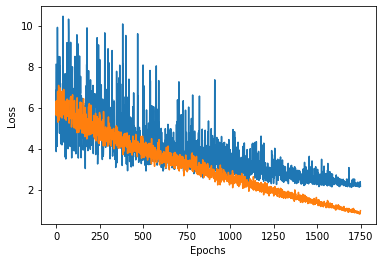

In [14]:
plt.plot(history.history['val_abs_max_err'][500:])
plt.plot(history.history['abs_max_err'][500:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [15]:
model.evaluate(props,eui,batch_size=48)

216/216 [==============================] - 1s 5ms/step - loss: 0.4789 - mae: 0.2167 - abs_max_err: 0.8143 - mse: 0.0893


[0.4789418876171112,
 0.2166581153869629,
 0.8143227100372314,
 0.08928953856229782]

Printing model predictions

Text(0, 0.5, 'eui')

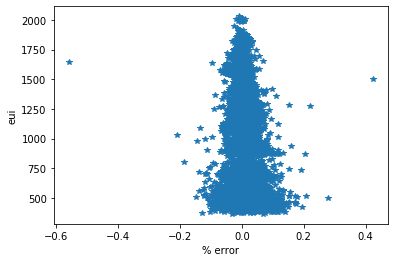

In [17]:
perc=(model.predict(props)-eui)/eui*100
plt.plot(perc[:],eui[:],'*',label='1')
plt.xlabel('% error')
plt.ylabel('eui')


# Load new data

Training/validation split was done manually on a randonly shuffled dataset. The reason is that model.fit(validation_split=x%) takes first x% of the data without shuffling it

In [7]:
# columns: Rfloor / Rwalls / Rroof / Rotation / WWR / EUI
dataset1=loadtxt('data_samevol.csv',delimiter=',')
np.random.shuffle(dataset1) 
tr=int(len(dataset1)*0.0625)
train=dataset1[0:tr,:]
test=dataset1[tr:,:]
train_props=train[:,:5]
train_eui=train[:,5:]
test_props=test[:,:5]
test_eui=test[:,5:]
print(np.mean(train_eui))
print(np.mean(dataset1[:,5:]))

1111.9537037037037
1126.6650752314815


# Quick check that loaded weights give the same result

In [24]:
tf.keras.backend.clear_session()    

bias_init= tf.keras.initializers.Constant(np.mean(train_eui))

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-6)
    
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 3e-5*(550-epoch)/475) 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(900,kernel_initializer=initializer,input_dim=5
                                ,activity_regularizer=regularizers.l2(2e-5)
                               ))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.Dense(550,kernel_initializer=initializer))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.Dense(300,kernel_initializer=initializer,
                                activity_regularizer=regularizers.l2(1e-6)))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.Dense(128,kernel_initializer=initializer,activation=tf.keras.activations.selu))
model.add(tf.keras.layers.Dense(32,kernel_initializer=initializer,activation=tf.keras.activations.selu))
model.add(tf.keras.layers.Dense(1,use_bias=True, bias_initializer=bias_init))

model.compile(loss = root_mean_squared_error,
              optimizer = optimizer,
             metrics=['mae',abs_max_err,'mse'])

Performance with untrained weights

Text(0, 0.5, 'eui')

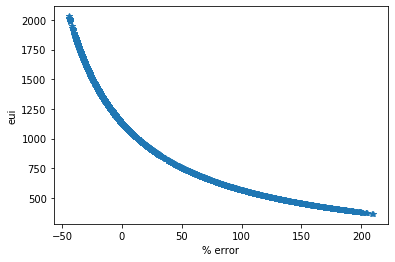

In [25]:
perc=(model.predict(props)-eui)/eui*100
plt.plot(perc[:],eui[:],'*')
plt.xlabel('% error')
plt.ylabel('eui')

In [26]:
model.load_weights('cp.ckpt')

Text(0, 0.5, 'eui')

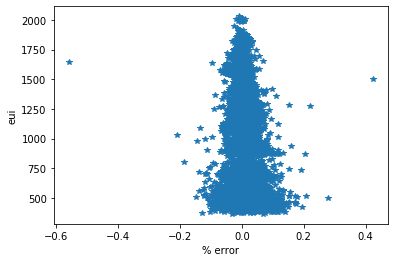

In [27]:
perc=(model.predict(props)-eui)/eui*100
plt.plot(perc[:],eui[:],'*')
plt.xlabel('% error')
plt.ylabel('eui')

Above graph is the same as the first one. Weights were saved and loaded correctly.

# Transfer learning for the second model


Leaving only last 2 layes as trainable to enable transfer learning

In [28]:
layers=['dense','activation', 'dense_1','activation_1','dense_2','activation_2','dense_3']
for i in layers:
    model.get_layer(i).trainable=False

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 900)               5400      
_________________________________________________________________
activation (Activation)      (None, 900)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 550)               495550    
_________________________________________________________________
activation_1 (Activation)    (None, 550)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               165300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

Train and save weights:

In [30]:
history = model.fit(train_props,train_eui, epochs=70, batch_size=24, 
                    #callbacks=[lr_schedule],
                    validation_data=(test_props,test_eui))

Epoch 1/70
27/27 [==============================] - 2s 59ms/step - loss: 40.0924 - mae: 33.5634 - abs_max_err: 65.5717 - mse: 1805.2194 - val_loss: 15.2059 - val_mae: 11.9640 - val_abs_max_err: 29.4444 - val_mse: 228.6543
Epoch 2/70
27/27 [==============================] - 1s 47ms/step - loss: 11.8561 - mae: 9.5013 - abs_max_err: 27.5853 - mse: 142.0997 - val_loss: 7.3164 - val_mae: 5.2852 - val_abs_max_err: 18.4361 - val_mse: 52.8870
Epoch 3/70
27/27 [==============================] - 1s 46ms/step - loss: 5.7422 - mae: 4.0902 - abs_max_err: 15.2696 - mse: 32.8688 - val_loss: 4.2954 - val_mae: 2.8827 - val_abs_max_err: 12.0149 - val_mse: 18.1965
Epoch 4/70
27/27 [==============================] - 1s 47ms/step - loss: 3.8249 - mae: 2.5325 - abs_max_err: 11.3461 - mse: 14.2182 - val_loss: 3.2227 - val_mae: 2.0625 - val_abs_max_err: 9.5495 - val_mse: 10.3613
Epoch 5/70
27/27 [==============================] - 1s 51ms/step - loss: 3.1692 - mae: 2.0468 - abs_max_err: 9.4441 - mse: 10.0768 -

In [31]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='cp1.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1)
model.fit(train_props,train_eui, epochs=1, batch_size=24, 
                    callbacks=[cp_callback ],
                    validation_data=(test_props,test_eui))

27/27 [==============================] - ETA: 0s - loss: 0.7135 - mae: 0.4065 - abs_max_err: 1.3078 - mse: 0.2791
Epoch 00001: saving model to cp1.ckpt
27/27 [==============================] - 2s 58ms/step - loss: 0.7135 - mae: 0.4065 - abs_max_err: 1.3078 - mse: 0.2791 - val_loss: 0.9493 - val_mae: 0.5292 - val_abs_max_err: 2.2523 - val_mse: 0.6730


Text(0, 0.5, 'eui')

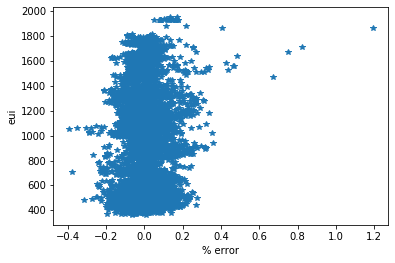

In [32]:
perc=(model.predict(dataset1[:,:5])-dataset1[:,5:])/dataset1[:,5:]*100
plt.plot(perc[:],dataset1[:,5:],'*')
plt.xlabel('% error')
plt.ylabel('eui')

Text(0, 0.5, 'Loss')

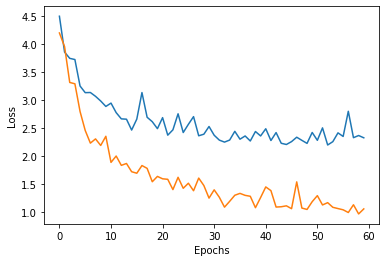

In [33]:
plt.plot(history.history['val_abs_max_err'][10:])
plt.plot(history.history['abs_max_err'][10:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Transfer learning for the third model

In [74]:
# columns: Rfloor / Rwalls / Rroof / Rotation / WWR / EUI

dataset2=loadtxt('data_samewall.csv',delimiter=',')
np.random.shuffle(dataset2) 
tr=int(len(dataset2)*0.0625)
train=dataset2[0:tr,:]
test=dataset2[tr:,:]
train_props=train[:,:5]
train_eui=train[:,5:]
test_props=test[:,:5]
test_eui=test[:,5:]
print(np.mean(train_eui))
print(np.mean(dataset2[:,5:]))

1188.2938176197836
1182.058686215877


In [75]:
tf.keras.backend.clear_session()    

bias_init2= tf.keras.initializers.Constant(np.mean(train_eui))

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-6)
    
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 3e-5*(550-epoch)/475) 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(900,kernel_initializer=initializer,input_dim=5
                                ,activity_regularizer=regularizers.l2(2e-5)
                               ))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.Dense(550,kernel_initializer=initializer))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.Dense(300,kernel_initializer=initializer,
                                activity_regularizer=regularizers.l2(1e-6)))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.Dense(128,kernel_initializer=initializer,activation=tf.keras.activations.selu))
model.add(tf.keras.layers.Dense(32,kernel_initializer=initializer,activation=tf.keras.activations.selu))
model.add(tf.keras.layers.Dense(1,use_bias=True, bias_initializer=bias_init))

model.compile(loss = root_mean_squared_error,
              optimizer = optimizer,
             metrics=['mae',abs_max_err,'mse'])


In [ ]:
model.load_weights('cp.ckpt')

In [77]:
layers=['dense','activation', 'dense_1','activation_1','dense_2','activation_2','dense_3']
for i in layers:
    model.get_layer(i).trainable=False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 900)               5400      
_________________________________________________________________
activation (Activation)      (None, 900)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 550)               495550    
_________________________________________________________________
activation_1 (Activation)    (None, 550)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               165300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [78]:
history = model.fit(train_props,train_eui, epochs=70, batch_size=24, 
                    #callbacks=[lr_schedule],
                    validation_data=(test_props,test_eui))

Epoch 1/70
27/27 [==============================] - 1s 54ms/step - loss: 5.0072 - mae: 3.9013 - abs_max_err: 11.4863 - mse: 25.3403 - val_loss: 3.0947 - val_mae: 2.1095 - val_abs_max_err: 8.4214 - val_mse: 8.8400
Epoch 2/70
27/27 [==============================] - 1s 47ms/step - loss: 2.4323 - mae: 1.6490 - abs_max_err: 6.4559 - mse: 5.2857 - val_loss: 2.1333 - val_mae: 1.4381 - val_abs_max_err: 4.8976 - val_mse: 3.8789
Epoch 3/70
27/27 [==============================] - 1s 47ms/step - loss: 1.7402 - mae: 1.0755 - abs_max_err: 4.5985 - mse: 2.5530 - val_loss: 1.4699 - val_mae: 0.8850 - val_abs_max_err: 3.8807 - val_mse: 1.7509
Epoch 4/70
27/27 [==============================] - 1s 48ms/step - loss: 1.3563 - mae: 0.7890 - abs_max_err: 3.4362 - mse: 1.4982 - val_loss: 1.6624 - val_mae: 0.9936 - val_abs_max_err: 4.5966 - val_mse: 2.3192
Epoch 5/70
27/27 [==============================] - 1s 47ms/step - loss: 1.1844 - mae: 0.7093 - abs_max_err: 2.8378 - mse: 1.0720 - val_loss: 1.1118 - val

Epoch 40/70
27/27 [==============================] - 2s 57ms/step - loss: 0.6291 - mae: 0.3408 - abs_max_err: 0.9209 - mse: 0.1898 - val_loss: 0.7351 - val_mae: 0.3770 - val_abs_max_err: 1.6126 - val_mse: 0.3206
Epoch 41/70
27/27 [==============================] - 2s 56ms/step - loss: 0.6138 - mae: 0.3325 - abs_max_err: 0.9389 - mse: 0.1755 - val_loss: 0.7441 - val_mae: 0.4081 - val_abs_max_err: 1.5203 - val_mse: 0.3256
Epoch 42/70
27/27 [==============================] - 1s 55ms/step - loss: 0.6087 - mae: 0.3155 - abs_max_err: 1.0132 - mse: 0.1713 - val_loss: 0.7794 - val_mae: 0.4185 - val_abs_max_err: 1.6506 - val_mse: 0.3654
Epoch 43/70
27/27 [==============================] - 2s 57ms/step - loss: 0.6407 - mae: 0.3240 - abs_max_err: 1.1959 - mse: 0.2057 - val_loss: 0.7550 - val_mae: 0.4039 - val_abs_max_err: 1.6048 - val_mse: 0.3379
Epoch 44/70
27/27 [==============================] - 2s 65ms/step - loss: 0.6475 - mae: 0.3603 - abs_max_err: 1.0470 - mse: 0.2066 - val_loss: 0.7599 - 

In [79]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='cp2.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1)
model.fit(train_props,train_eui, epochs=1, batch_size=24, 
                    callbacks=[cp_callback ],
                    validation_data=(test_props,test_eui))

23/27 [========================>.....] - ETA: 0s - loss: 0.5735 - mae: 0.2970 - abs_max_err: 0.9439 - mse: 0.1445
Epoch 00001: saving model to cp2.ckpt
27/27 [==============================] - 2s 59ms/step - loss: 0.5767 - mae: 0.2983 - abs_max_err: 0.9288 - mse: 0.1447 - val_loss: 0.6897 - val_mae: 0.3587 - val_abs_max_err: 1.3856 - val_mse: 0.2657


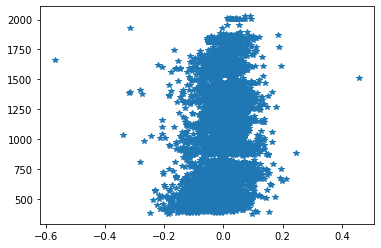

In [80]:
perc=(model.predict(dataset2[:,:5])-dataset2[:,5:])/dataset2[:,5:]*100
plt.plot(perc[:],dataset2[:,5:],'*')

# All models predicted by one net

With aim to demonstrate the effect of transfer learning graphically, we now can use weigths of the third models to predict results of all three models

Text(0, 0.5, 'eui')

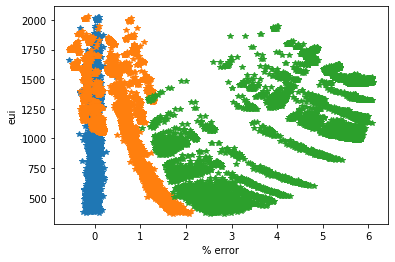

In [83]:
perc=(model.predict(dataset2[:,:5])-dataset2[:,5:])/dataset2[:,5:]*100
plt.plot(perc[:],dataset2[:,5:],'*')
perc1=(model.predict(props)-eui)/eui*100
plt.plot(perc1[:],eui[:],'*')
perc2=(model.predict(dataset1[:,:5])-dataset1[:,5:])/dataset1[:,5:]*100
plt.plot(perc2[:],dataset1[:,5:],'*')
plt.xlabel('% error')
plt.ylabel('eui')

Some values from 'other' models are predicted with a good accuracy due to their similarity

# Now we have weigths that we can use to train an accurate Neural Network for another BIM model to predict its Energy Performance